<a href="https://colab.research.google.com/github/rajkumar-11812510/Rajkumar-Muraoo/blob/main/ImageClassification_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import numpy as np
from tensorflow.keras import layers
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
plt.style.use('fivethirtyeight')

In [74]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [75]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [76]:
#Geting the shape of array
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [77]:
# First image as array
index =10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

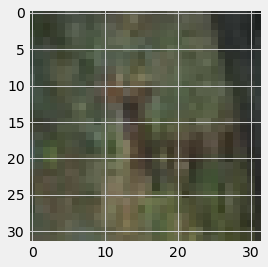

In [78]:
#showing the image as picture
img=plt.imshow(x_train[index])

In [79]:
#geting the image label
print("The image label:",y_train[index])

The image label: [4]


In [80]:
#get the image classification
classification=['aeroplane','mobile','cat','dog','deer','dog','frog','horse','ship','truck']
# print the image class
print("The image class is:",classification[y_train[index][0]])

The image class is: deer


In [81]:
#convert the label into a set of 10 number of input into nural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [83]:
#print the new label
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [84]:
#print the new label of the image above
print('The one hot label is:',y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [85]:
#Normalize the picture to values between 1 or 0
x_train=x_train/255
x_test=x_test/255

In [86]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [87]:
#create the model
model=Sequential()
#add 1st layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

# Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add another conventionl layer
model.add(Conv2D(32,(5,5),activation='relu'))

# Add Flatten layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000,activation='relu'))

# Add a dropout layer 
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500,activation='relu'))

# Add a dropout layer 
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250,activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10,activation='softmax'))



In [88]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
# Train the model
hist=model.fit(x_train,y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 65s 409ms/step - loss: 1.8464 - accuracy: 0.3085 - val_loss: 1.5168 - val_accuracy: 0.4473
Epoch 2/10
157/157 [==============================] - 64s 409ms/step - loss: 1.4813 - accuracy: 0.4580 - val_loss: 1.3649 - val_accuracy: 0.5134
Epoch 3/10
157/157 [==============================] - 63s 404ms/step - loss: 1.3214 - accuracy: 0.5228 - val_loss: 1.2578 - val_accuracy: 0.5535
Epoch 4/10
157/157 [==============================] - 63s 404ms/step - loss: 1.2039 - accuracy: 0.5687 - val_loss: 1.1672 - val_accuracy: 0.5862
Epoch 5/10
157/157 [==============================] - 63s 404ms/step - loss: 1.1005 - accuracy: 0.6068 - val_loss: 1.0947 - val_accuracy: 0.6177
Epoch 6/10
157/157 [==============================] - 64s 405ms/step - loss: 1.0249 - accuracy: 0.6342 - val_loss: 1.0543 - val_accuracy: 0.6298
Epoch 7/10
157/157 [==============================] - 63s 403ms/step - loss: 0.9498 - accuracy: 0.6635 - val_loss: 0.9997 - val_ac

In [90]:
# Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 1.0417 - accuracy: 0.6501


0.6500999927520752

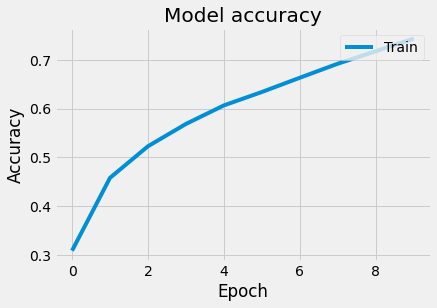

In [92]:
#visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper right')
plt.show()

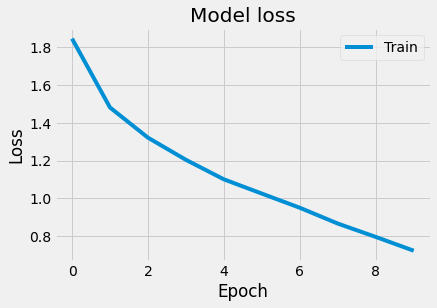

In [94]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [96]:
# test the model with examples
from google.colab import files
uploaded=files.upload()


Saving Dog.jfif to Dog.jfif


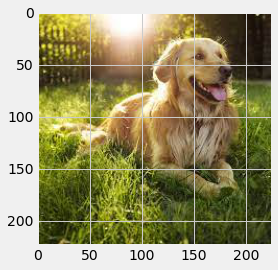

In [100]:
#Show the image
new_image=plt.imread("Dog.jfif")
img=plt.imshow(new_image)

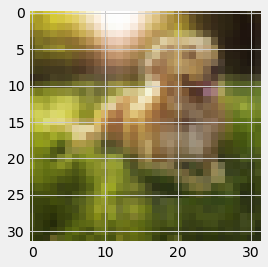

In [105]:
#Resize image 
from skimage.transform import resize
resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image)

In [107]:
# Get the model prediction
predictions=model.predict(np.array([resized_image]))
#Showing the prediction
predictions

array([[4.5280557e-04, 2.0900539e-04, 2.0880927e-01, 1.1810134e-01,
        1.0174739e-01, 4.7010055e-01, 6.5535560e-02, 3.4293655e-02,
        3.1096989e-04, 4.3937340e-04]], dtype=float32)

In [114]:
# Sorting the pprediction from least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]> x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
print(list_index)


[5, 2, 3, 4, 6, 7, 0, 9, 8, 1]


In [118]:
# printing the firt 5 predictions
for i in range(5):
  print(classification[list_index[i]],':',round(predictions[0][list_index[i]] * 100,2), '%')

dog : 47.01 %
cat : 20.88 %
dog : 11.81 %
deer : 10.17 %
frog : 6.55 %
